## Machine Learning Algorithms
- prediction
- accuracy
- rmse

In [167]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
pd.set_option('display.max_columns', None)

In [168]:
df_train = pd.read_csv('clean.csv')

In [169]:
df_train.head(5)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitche

In [170]:
#Set Y for dependent or predicted variable
y = df_train['SalePrice']

In [171]:
#Drop columns not needed for predication in model
df_train = df_train.drop(['Order', 'PID', 'SalePrice'], axis=1)

In [187]:
#x = df_train
x = df_train

In [188]:
#Call train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 10)

In [189]:
x_train.shape, y_train.shape

((2051, 304), (2051,))

In [190]:
#Testing a single value
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train.values.reshape(-1,1))

In [191]:
#Call fit to train model
model = LinearRegression().fit(x_train, y_train)

In [192]:
#Score model and check accuracy
#Is this the R2? Yes.  This explains x% of the variance in the model.
accuracy = model.score(x_test, y_test)
accuracy

0.8699072787695554

In [155]:
#make a prediction on the x_test data set
y_pred = model.predict(x_test)

In [156]:
#Calculate mean squared error
#Check other metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))
print('bias', np.mean(y_pred - y_test))
print('mae', mean_absolute_error(y_test, y_pred))
print('max deviation',  np.max(np.abs(y_pred - y_test)))
print('r2', r2_score(y_test, y_pred))
print('accuracy', accuracy)

MSE:  887931218.1878769
RMSE:  29798.174745911485
bias -90.70446813727783
mae 16743.031655400388
max deviation 427367.21571266395
r2 0.8699072787695554
accuracy 0.8699072787695554


In [159]:
def bias_score(y_test, y_pred):
    """Determine the bias of a prediction."""
    assert y_test.shape == y_pred.shape
    assert y_test.ndim == 1
    return np.mean(y_pred - y_test)
bias_score(y_test, y_pred)
      #  mae.append(mean_absolute_error(y_true, y_pred))
       # max_dev.append(max_deviation(y_true, y_pred))
       # r2.append(r2_score(y_true, y_pred))
       # rmse.append(mean_squared_error(y_true, y_pred))

-90.70446813727783

In [103]:

r2_score(y_test, y_pred)

0.8699072787695554

In [164]:
from sklearn.ensemble import RandomForestClassifier 
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 300) 

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
rfmodel = clf.fit(x_train, y_train) 

# performing predictions on the test dataset 
y_pred = clf.predict(x_test) 

# metrics are used to find accuracy or error 
from sklearn import metrics 
print(rfmodel.score(x_test, y_test))
# using metrics module for accuracy calculation 
#print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 
from sklearn.metrics import mean_squared_error
from math import sqrt
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))
print('bias', np.mean(y_pred - y_test))
print('mae', mean_absolute_error(y_test, y_pred))
print('max deviation',  np.max(np.abs(y_pred - y_test)))
print('r2', r2_score(y_test, y_pred))
#print('accuracy', accuracy)

0.027303754266211604
MSE:  1320582644.8862343
RMSE:  36339.82175088692
bias -3929.227531285552
mae 23602.342434584756
max deviation 279715
r2 0.8065185834623989


In [162]:
#https://medium.com/codex/step-by-step-guide-to-simple-and-multiple-linear-regression-in-python-867ac9a30298
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']), model.score(x_test, y_test))

R-Squared : 0.8699072787695554


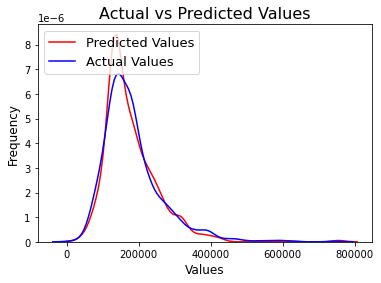

In [163]:
#yhat == y_pred
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
sb.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

In [10]:
#Kaggle only, reverse y_pred if using the log version earlier for competition submissions
#y_pred = np.expm1(y_pred)
#y_pred

In [ ]:
##Write results out to csv for kaggle
#submission = pd.DataFrame({
#    "Id": df_test["Id"],
#    "SalePrice": y_pred
#})

#submission.to_csv("kaggle.csv", index = False)